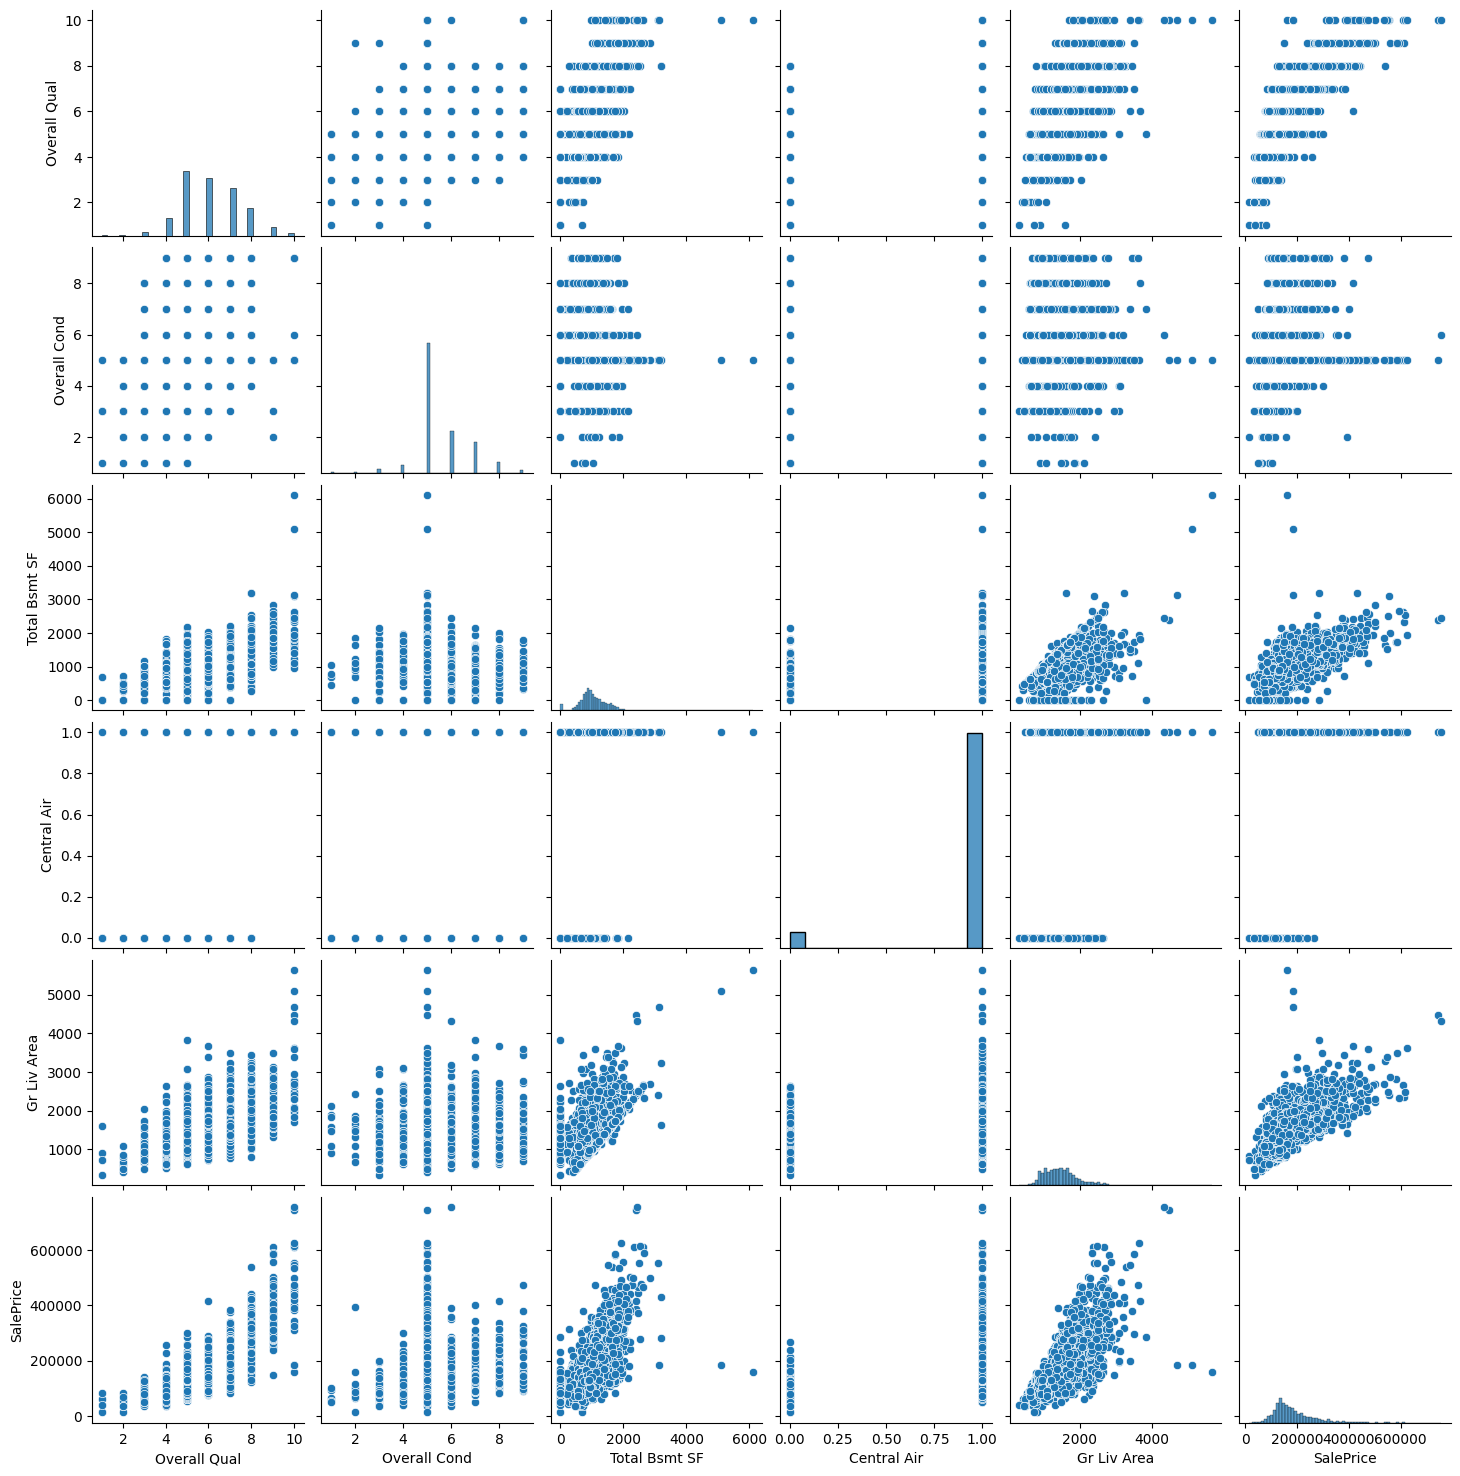

<class 'pandas.core.frame.DataFrame'>
Index: 2929 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2929 non-null   int64  
 1   Overall Cond   2929 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2929 non-null   int64  
 4   Gr Liv Area    2929 non-null   int64  
 5   SalePrice      2929 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 160.2 KB
None


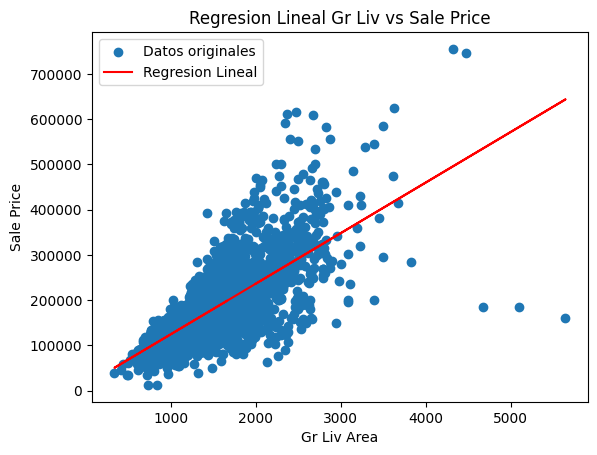

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def load(columns=None):
    path="AmesHousing.txt"
    data=pd.read_csv(path,delimiter='\t',usecols=columns)
    return data

def transform(sc,X,y):
    X_sc=sc.fit_transform(X)
    y_sc=sc.fit_transform(y)
    return X_sc,y_sc

def linearR(X,y):
    y=y.reshape(-1,1)
    #print(y)
    sc=StandardScaler()
    X_sc,y_sc=transform(sc, X, y)
    model=LinearRegression()
    model.fit(X_sc,y_sc)
    y_pred_sc=model.predict(X_sc)
    
    y_orig_pred=sc.inverse_transform(y_pred_sc)
    y_orig=y.reshape(-1)
    
    plt.scatter(X, y_orig,label='Datos originales')
    plt.plot(X,y_orig_pred,color='red',label='Regresion Lineal')
    plt.xlabel('Gr Liv Area')
    plt.ylabel('Sale Price')
    plt.title('Regresion Lineal Gr Liv vs Sale Price')
    plt.legend()
    plt.show()

def main():
    columns=['Overall Qual','Overall Cond','Gr Liv Area','Central Air','Total Bsmt SF','SalePrice']
    data=load(columns)
    pd.set_option('display.max_columns',None)
    #print(data.head())
    data['Central Air']=data['Central Air'].map({'N':0,'Y':1})
    #print(data)
    #print(data.isnull().sum())
    data=data.dropna(axis=0)
    #print(data.isnull().sum())    
    sns.pairplot(data)
    plt.show()
    
    print(data.info())
    X=data[['Gr Liv Area']].values
    #print(X.shape)
    y=data['SalePrice'].values
    #print(y.shape)
    linearR(X,y)

main()